# 各地区气象数据合并

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
path='F:\\weather\\'

In [3]:
data_huadong=pd.read_csv(path+'huadong.csv',sep=',')
data_huabei=pd.read_csv(path+'huabei.csv',sep=',')
data_huanan=pd.read_csv(path+'huanan.csv',sep=',')
data_huazhong=pd.read_csv(path+'huazhong.csv',sep=',')
data_xibei=pd.read_csv(path+'xibei.csv',sep=',')
data_xinan=pd.read_csv(path+'xinan.csv',sep=',')
data_dongbei=pd.read_csv(path+'dongbei.csv',sep=',')

## 数据全合并

In [4]:
data_all=pd.concat([data_huadong,data_huabei,data_huazhong,data_huanan,data_xibei,data_xinan,data_dongbei])

In [5]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30557843 entries, 0 to 2888831
Data columns (total 11 columns):
Station_Id_C    int64
Year            float64
Mon             float64
Day             float64
Hour            float64
RHU             int64
TEM             float64
TEM_Max         float64
TEM_Min         float64
省份              object
Area            object
dtypes: float64(7), int64(2), object(2)
memory usage: 2.7+ GB


合并后30,557,843条数据

__核对温度是否符合：温度最大、最小、平均值之间逻辑关系：最小≤平均≤最大__

In [5]:
data_all_valid=data_all[:]

In [6]:
data_all_valid['valid1']=data_all['TEM_Max']-data_all['TEM']
data_all_valid['valid2']=data_all['TEM']-data_all['TEM_Min']

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [7]:
data_valid=data_all_valid[(data_all_valid['valid1']>=0) | (data_all_valid['valid2']>=0)]

In [10]:
data_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30557842 entries, 0 to 2888831
Data columns (total 13 columns):
Station_Id_C    int64
Year            float64
Mon             float64
Day             float64
Hour            float64
RHU             int64
TEM             float64
TEM_Max         float64
TEM_Min         float64
省份              object
Area            object
valid1          float64
valid2          float64
dtypes: float64(9), int64(2), object(2)
memory usage: 3.2+ GB


In [8]:
data_valid.to_csv('F:\\weather\\data_valid.txt',index=False,sep='\t',encoding='utf_8_sig')

可见只有1条温度数据不符合逻辑。

In [4]:
data_valid=pd.read_table(path+'data_valid.txt',sep='\t')

__统计“测定站-年-月-日”，当天数据量≥16条的保留（总共24条），其余剔除__

In [5]:
data_allh=data_valid[:]

In [6]:
data_allh['Station_Id_C']=data_allh['Station_Id_C'].apply(lambda s : str(s))

In [7]:
data_allh['Year']=data_allh['Year'].apply(lambda s : str(s))

In [8]:
data_allh['Mon']=data_allh['Mon'].apply(lambda s : str(s))

In [9]:
data_allh['Day']=data_allh['Day'].apply(lambda s : str(s))

In [10]:
data_allh['SYMD']=data_allh['Station_Id_C']+'-'+data_allh['Year']+'-'+data_allh['Mon']+'-'+data_allh['Day']

In [11]:
valid=data_allh['SYMD'].value_counts()
valid1=valid.to_frame('SYMD_count')

In [12]:
data_allh1=pd.merge(data_allh,valid1,left_on='SYMD',right_index=True)

In [13]:
data_allh1.to_csv('F:\\weather\\data_allh1.txt',index=False,sep='\t',encoding='utf_8_sig')

In [3]:
data_allh1=pd.read_table(path+'data_allh1.txt',sep='\t')

In [4]:
data_allhf=data_allh1[data_allh1['SYMD_count']>=16]

In [6]:
data_allhf.head()

,Station_Id_C,Year,Mon,Day,Hour,RHU,TEM,TEM_Max,TEM_Min,省份,Area,valid1,valid2,SYMD,SYMD_count
0,58361,2015.0,12.0,30.0,0.0,96,4.2,4.2,2.5,上海,huadong,0.0,1.7,58361-2015.0-12.0-30.0,24
1,58361,2015.0,12.0,30.0,1.0,77,7.7,7.7,4.2,上海,huadong,0.0,3.5,58361-2015.0-12.0-30.0,24
2,58361,2015.0,12.0,30.0,2.0,70,9.4,9.5,7.7,上海,huadong,0.1,1.7,58361-2015.0-12.0-30.0,24
3,58361,2015.0,12.0,30.0,3.0,62,10.5,10.6,9.4,上海,huadong,0.1,1.1,58361-2015.0-12.0-30.0,24
4,58361,2015.0,12.0,30.0,4.0,55,11.4,11.5,10.5,上海,huadong,0.1,0.9,58361-2015.0-12.0-30.0,24


In [5]:
data_allhf['Station_Id_C'].count()

29372794

In [7]:
data_allhf.to_csv('F:\\weather\\data_allhf.txt',index=False,sep='\t',encoding='utf_8_sig')

保留了足够重复数据29,372,794行

__统计“测定站-年-月”，当月数据量≥15天以上保留（总共28-31条），其余剔除__

In [227]:
# data_bjd=data_bjhf[:]

# data_bjd['SYM']=data_bjd['Station_Id_C']+'-'+data_bjd['Year']+'-'+data_bjd['Mon']

# data_bjd1=data_bjd.drop_duplicates('SYMD',keep='first')

# valid=data_bjd1['SYM'].value_counts()
# valid1=valid.to_frame('SYM_count')

# data_bjd2=pd.merge(data_bjd,valid1,left_on='SYM',right_index=True,how='left')

# data_bjdf=data_bjd2[data_bjd2['SYM_count']>=15]

# data_bjdf.info()

保留了足够重复数据154,408行。

In [4]:
data_allhf=pd.read_table(path+'data_allhf.txt',sep='\t')

__计算北京市温湿度指数（THI），取平均温度计算。计算公式：THI=0.81*温度+(0.99*温度-14.3)*相对湿度/100+46.3__

In [14]:
data_all_final=data_allhf[['Station_Id_C','Year','Mon','Day','Hour','RHU','TEM','TEM_Max','TEM_Min','省份','Area']]

In [15]:
data_all_final['Year']=data_all_final['Year'].apply(lambda s :float(s))

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
data_all_final['Mon']=data_all_final['Mon'].apply(lambda s :float(s))

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
data_all_final['Day']=data_all_final['Day'].apply(lambda s :float(s))

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
data_all_final['THI']=0.81*data_all_final['TEM']+(0.99*data_all_final['TEM']-14.3)*(data_all_final['RHU']/100)+46.3

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
data_all_final.head()

,Station_Id_C,Year,Mon,Day,Hour,RHU,TEM,TEM_Max,TEM_Min,省份,Area,THI
0,58361,2015.0,12.0,30.0,0.0,96,4.2,4.2,2.5,上海,huadong,39.96568
1,58361,2015.0,12.0,30.0,1.0,77,7.7,7.7,4.2,上海,huadong,47.39571
2,58361,2015.0,12.0,30.0,2.0,70,9.4,9.5,7.7,上海,huadong,50.41820
3,58361,2015.0,12.0,30.0,3.0,62,10.5,10.6,9.4,上海,huadong,52.38390
4,58361,2015.0,12.0,30.0,4.0,55,11.4,11.5,10.5,上海,huadong,53.87630


In [11]:
data_all_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29372794 entries, 0 to 29372793
Data columns (total 10 columns):
Station_Id_C    int64
Year            float64
Mon             float64
Day             float64
Hour            float64
RHU             int64
TEM             float64
TEM_Max         float64
TEM_Min         float64
THI             float64
dtypes: float64(8), int64(2)
memory usage: 2.2 GB


In [20]:
data_all_final.to_csv("F:\\weather\\all-plot.csv",index=False,sep=',')

## 画图前数据整合

__堆叠柱状图反映365天中THI的变化__

### 华东

In [25]:
huadong=data_all_final[data_all_final['Area']=='huadong']

In [26]:
huadong.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7147835 entries, 0 to 7147834
Data columns (total 12 columns):
Station_Id_C    int64
Year            float64
Mon             float64
Day             float64
Hour            float64
RHU             int64
TEM             float64
TEM_Max         float64
TEM_Min         float64
省份              object
Area            object
THI             float64
dtypes: float64(8), int64(2), object(2)
memory usage: 708.9+ MB


In [44]:
huadong['THI']=list(map(lambda s: float(s),huadong['THI']))
huadong['Mon']=list(map(lambda s: int(s),huadong['Mon']))
huadong['Day']=list(map(lambda s: int(s),huadong['Day']))
huadong['Year']=list(map(lambda s: int(s),huadong['Year']))

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.

In [45]:
huadong_y=huadong[huadong['THI']<=100] #删除THI异常值

In [48]:
huadong_y['Mon']=list(map(lambda s: str(s),huadong_y['Mon']))
huadong_y['Day']=list(map(lambda s: str(s),huadong_y['Day']))
huadong_y['Year']=list(map(lambda s: str(s),huadong_y['Year']))

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.

In [49]:
huadong_y['Y-M-D']=huadong_y['Year']+'-'+huadong_y['Mon']+'-'+huadong_y['Day']

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [50]:
mean_THI_hd=huadong_y['THI'].groupby([huadong_y['Y-M-D']]).mean()

In [51]:
m_THI_hd=mean_THI_hd.to_frame('mean_THI')

In [52]:
huadong_f=pd.merge(huadong_y,m_THI_hd,left_on='Y-M-D',right_index=True)

In [53]:
huadong_f.head()

,Station_Id_C,Year,Mon,Day,Hour,RHU,TEM,TEM_Max,TEM_Min,省份,Area,THI,Y-M-D,mean_THI
0,58361,2015,12,30,0.0,96,4.2,4.2,2.5,上海,huadong,39.96568,2015-12-30,44.325135
1,58361,2015,12,30,1.0,77,7.7,7.7,4.2,上海,huadong,47.39571,2015-12-30,44.325135
2,58361,2015,12,30,2.0,70,9.4,9.5,7.7,上海,huadong,50.41820,2015-12-30,44.325135
3,58361,2015,12,30,3.0,62,10.5,10.6,9.4,上海,huadong,52.38390,2015-12-30,44.325135
4,58361,2015,12,30,4.0,55,11.4,11.5,10.5,上海,huadong,53.87630,2015-12-30,44.325135


In [55]:
huadong_f['Mon']=list(map(lambda s: int(s),huadong_f['Mon']))
huadong_f['Day']=list(map(lambda s: int(s),huadong_f['Day']))

In [56]:
huadong_f1=huadong_f.drop_duplicates(['Year','Mon','Day','mean_THI'],keep='first')[['Year','Mon','Day','mean_THI']].sort_values(by=['Year','Mon','Day'])

In [70]:
huadong_f2=huadong_f1[(huadong_f1['Year']=='2017')|(huadong_f1['Year']=='2016')]

In [71]:
huadong_f2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 48 to 15113
Data columns (total 4 columns):
Year        660 non-null object
Mon         660 non-null int64
Day         660 non-null int64
mean_THI    660 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 25.8+ KB


### 华北

In [58]:
huabei=data_all_final[data_all_final['Area']=='huabei']

print(huabei.info())
print('--'*40)

huabei['THI']=list(map(lambda s: float(s),huabei['THI']))
huabei['Mon']=list(map(lambda s: int(s),huabei['Mon']))
huabei['Day']=list(map(lambda s: int(s),huabei['Day']))
huabei['Year']=list(map(lambda s: int(s),huabei['Year']))

huabei_y=huabei[huabei['THI']<=100] #删除THI异常值

huabei_y['Mon']=list(map(lambda s: str(s),huabei_y['Mon']))
huabei_y['Day']=list(map(lambda s: str(s),huabei_y['Day']))
huabei_y['Year']=list(map(lambda s: str(s),huabei_y['Year']))

huabei_y['Y-M-D']=huabei_y['Year']+'-'+huabei_y['Mon']+'-'+huabei_y['Day']

mean_THI_hb=huabei_y['THI'].groupby([huabei_y['Y-M-D']]).mean()

m_THI_hb=mean_THI_hb.to_frame('mean_THI')

huabei_f=pd.merge(huabei_y,m_THI_hb,left_on='Y-M-D',right_index=True)

huabei_f['Mon']=list(map(lambda s: int(s),huabei_f['Mon']))
huabei_f['Day']=list(map(lambda s: int(s),huabei_f['Day']))

huabei_f1=huabei_f.drop_duplicates(['Year','Mon','Day','mean_THI'],keep='first')[['Year','Mon','Day','mean_THI']].sort_values(by=['Year','Mon','Day'])

print(huabei_f1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5554278 entries, 7147835 to 12702112
Data columns (total 12 columns):
Station_Id_C    int64
Year            float64
Mon             float64
Day             float64
Hour            float64
RHU             int64
TEM             float64
TEM_Max         float64
TEM_Min         float64
省份              object
Area            object
THI             float64
dtypes: float64(8), int64(2), object(2)
memory usage: 550.9+ MB
None
--------------------------------------------------------------------------------


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\

<class 'pandas.core.frame.DataFrame'>
Int64Index: 670 entries, 7147883 to 7162927
Data columns (total 4 columns):
Year        670 non-null object
Mon         670 non-null int64
Day         670 non-null int64
mean_THI    670 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 26.2+ KB
None


In [72]:
huabei_f2=huabei_f1[(huabei_f1['Year']=='2017')|(huabei_f1['Year']=='2016')]
huabei_f2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 662 entries, 7147931 to 7162788
Data columns (total 4 columns):
Year        662 non-null object
Mon         662 non-null int64
Day         662 non-null int64
mean_THI    662 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 25.9+ KB


### 华南

In [59]:
huanan=data_all_final[data_all_final['Area']=='huanan']

print(huanan.info())
print('--'*40)

huanan['THI']=list(map(lambda s: float(s),huanan['THI']))
huanan['Mon']=list(map(lambda s: int(s),huanan['Mon']))
huanan['Day']=list(map(lambda s: int(s),huanan['Day']))
huanan['Year']=list(map(lambda s: int(s),huanan['Year']))

huanan_y=huanan[huanan['THI']<=100] #删除THI异常值

huanan_y['Mon']=list(map(lambda s: str(s),huanan_y['Mon']))
huanan_y['Day']=list(map(lambda s: str(s),huanan_y['Day']))
huanan_y['Year']=list(map(lambda s: str(s),huanan_y['Year']))

huanan_y['Y-M-D']=huanan_y['Year']+'-'+huanan_y['Mon']+'-'+huanan_y['Day']

mean_THI_hn=huanan_y['THI'].groupby([huanan_y['Y-M-D']]).mean()

m_THI_hn=mean_THI_hn.to_frame('mean_THI')

huanan_f=pd.merge(huanan_y,m_THI_hn,left_on='Y-M-D',right_index=True)

huanan_f['Mon']=list(map(lambda s: int(s),huanan_f['Mon']))
huanan_f['Day']=list(map(lambda s: int(s),huanan_f['Day']))

huanan_f1=huanan_f.drop_duplicates(['Year','Mon','Day','mean_THI'],keep='first')[['Year','Mon','Day','mean_THI']].sort_values(by=['Year','Mon','Day'])

print(huanan_f1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2002105 entries, 16041790 to 18043894
Data columns (total 12 columns):
Station_Id_C    int64
Year            float64
Mon             float64
Day             float64
Hour            float64
RHU             int64
TEM             float64
TEM_Max         float64
TEM_Min         float64
省份              object
Area            object
THI             float64
dtypes: float64(8), int64(2), object(2)
memory usage: 198.6+ MB
None
--------------------------------------------------------------------------------


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 16041790 to 16053051
Data columns (total 4 columns):
Year        509 non-null object
Mon         509 non-null int64
Day         509 non-null int64
mean_THI    509 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 19.9+ KB
None


In [77]:
huanan_f2=huanan_f1[(huanan_f1['Year']=='2017')|(huanan_f1['Year']=='2016')]
huanan_f2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 16041838 to 16053027
Data columns (total 4 columns):
Year        506 non-null object
Mon         506 non-null int64
Day         506 non-null int64
mean_THI    506 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 19.8+ KB


### 华中

In [60]:
huazhong=data_all_final[data_all_final['Area']=='huazhong']

print(huazhong.info())
print('--'*40)

huazhong['THI']=list(map(lambda s: float(s),huazhong['THI']))
huazhong['Mon']=list(map(lambda s: int(s),huazhong['Mon']))
huazhong['Day']=list(map(lambda s: int(s),huazhong['Day']))
huazhong['Year']=list(map(lambda s: int(s),huazhong['Year']))

huazhong_y=huazhong[huazhong['THI']<=100] #删除THI异常值

huazhong_y['Mon']=list(map(lambda s: str(s),huazhong_y['Mon']))
huazhong_y['Day']=list(map(lambda s: str(s),huazhong_y['Day']))
huazhong_y['Year']=list(map(lambda s: str(s),huazhong_y['Year']))

huazhong_y['Y-M-D']=huazhong_y['Year']+'-'+huazhong_y['Mon']+'-'+huazhong_y['Day']

mean_THI_hz=huazhong_y['THI'].groupby([huazhong_y['Y-M-D']]).mean()

m_THI_hz=mean_THI_hz.to_frame('mean_THI')

huazhong_f=pd.merge(huazhong_y,m_THI_hz,left_on='Y-M-D',right_index=True)

huazhong_f['Mon']=list(map(lambda s: int(s),huazhong_f['Mon']))
huazhong_f['Day']=list(map(lambda s: int(s),huazhong_f['Day']))

huazhong_f1=huazhong_f.drop_duplicates(['Year','Mon','Day','mean_THI'],keep='first')[['Year','Mon','Day','mean_THI']].sort_values(by=['Year','Mon','Day'])

print(huazhong_f1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3339677 entries, 12702113 to 16041789
Data columns (total 12 columns):
Station_Id_C    int64
Year            float64
Mon             float64
Day             float64
Hour            float64
RHU             int64
TEM             float64
TEM_Max         float64
TEM_Min         float64
省份              object
Area            object
THI             float64
dtypes: float64(8), int64(2), object(2)
memory usage: 331.2+ MB
None
--------------------------------------------------------------------------------


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\

<class 'pandas.core.frame.DataFrame'>
Int64Index: 593 entries, 12702113 to 12715946
Data columns (total 4 columns):
Year        593 non-null object
Mon         593 non-null int64
Day         593 non-null int64
mean_THI    593 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 23.2+ KB
None


In [73]:
huazhong_f2=huazhong_f1[(huazhong_f1['Year']=='2017')|(huazhong_f1['Year']=='2016')]
huazhong_f2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590 entries, 12702161 to 12715922
Data columns (total 4 columns):
Year        590 non-null object
Mon         590 non-null int64
Day         590 non-null int64
mean_THI    590 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 23.0+ KB


### 西南

In [61]:
xinan=data_all_final[data_all_final['Area']=='xinan']

print(xinan.info())
print('--'*40)

xinan['THI']=list(map(lambda s: float(s),xinan['THI']))
xinan['Mon']=list(map(lambda s: int(s),xinan['Mon']))
xinan['Day']=list(map(lambda s: int(s),xinan['Day']))
xinan['Year']=list(map(lambda s: int(s),xinan['Year']))

xinan_y=xinan[xinan['THI']<=100] #删除THI异常值

xinan_y['Mon']=list(map(lambda s: str(s),xinan_y['Mon']))
xinan_y['Day']=list(map(lambda s: str(s),xinan_y['Day']))
xinan_y['Year']=list(map(lambda s: str(s),xinan_y['Year']))

xinan_y['Y-M-D']=xinan_y['Year']+'-'+xinan_y['Mon']+'-'+xinan_y['Day']

mean_THI_xn=xinan_y['THI'].groupby([xinan_y['Y-M-D']]).mean()

m_THI_xn=mean_THI_xn.to_frame('mean_THI')

xinan_f=pd.merge(xinan_y,m_THI_xn,left_on='Y-M-D',right_index=True)

xinan_f['Mon']=list(map(lambda s: int(s),xinan_f['Mon']))
xinan_f['Day']=list(map(lambda s: int(s),xinan_f['Day']))

xinan_f1=xinan_f.drop_duplicates(['Year','Mon','Day','mean_THI'],keep='first')[['Year','Mon','Day','mean_THI']].sort_values(by=['Year','Mon','Day'])

print(xinan_f1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4935695 entries, 21674520 to 26610214
Data columns (total 12 columns):
Station_Id_C    int64
Year            float64
Mon             float64
Day             float64
Hour            float64
RHU             int64
TEM             float64
TEM_Max         float64
TEM_Min         float64
省份              object
Area            object
THI             float64
dtypes: float64(8), int64(2), object(2)
memory usage: 489.5+ MB
None
--------------------------------------------------------------------------------


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\

<class 'pandas.core.frame.DataFrame'>
Int64Index: 631 entries, 21674520 to 21687044
Data columns (total 4 columns):
Year        631 non-null object
Mon         631 non-null int64
Day         631 non-null int64
mean_THI    631 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 24.6+ KB
None


In [74]:
xinan_f2=xinan_f1[(xinan_f1['Year']=='2017')|(xinan_f1['Year']=='2016')]
xinan_f2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 21674568 to 21687020
Data columns (total 4 columns):
Year        628 non-null object
Mon         628 non-null int64
Day         628 non-null int64
mean_THI    628 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 24.5+ KB


### 西北

In [62]:
xibei=data_all_final[data_all_final['Area']=='xibei']

print(xibei.info())
print('--'*40)

xibei['THI']=list(map(lambda s: float(s),xibei['THI']))
xibei['Mon']=list(map(lambda s: int(s),xibei['Mon']))
xibei['Day']=list(map(lambda s: int(s),xibei['Day']))
xibei['Year']=list(map(lambda s: int(s),xibei['Year']))

xibei_y=xibei[xibei['THI']<=100] #删除THI异常值

xibei_y['Mon']=list(map(lambda s: str(s),xibei_y['Mon']))
xibei_y['Day']=list(map(lambda s: str(s),xibei_y['Day']))
xibei_y['Year']=list(map(lambda s: str(s),xibei_y['Year']))

xibei_y['Y-M-D']=xibei_y['Year']+'-'+xibei_y['Mon']+'-'+xibei_y['Day']

mean_THI_xb=xibei_y['THI'].groupby([xibei_y['Y-M-D']]).mean()

m_THI_xb=mean_THI_xb.to_frame('mean_THI')

xibei_f=pd.merge(xibei_y,m_THI_xb,left_on='Y-M-D',right_index=True)

xibei_f['Mon']=list(map(lambda s: int(s),xibei_f['Mon']))
xibei_f['Day']=list(map(lambda s: int(s),xibei_f['Day']))

xibei_f1=xibei_f.drop_duplicates(['Year','Mon','Day','mean_THI'],keep='first')[['Year','Mon','Day','mean_THI']].sort_values(by=['Year','Mon','Day'])

print(xibei_f1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3630625 entries, 18043895 to 21674519
Data columns (total 12 columns):
Station_Id_C    int64
Year            float64
Mon             float64
Day             float64
Hour            float64
RHU             int64
TEM             float64
TEM_Max         float64
TEM_Min         float64
省份              object
Area            object
THI             float64
dtypes: float64(8), int64(2), object(2)
memory usage: 360.1+ MB
None
--------------------------------------------------------------------------------


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586 entries, 18043895 to 18056301
Data columns (total 4 columns):
Year        586 non-null object
Mon         586 non-null int64
Day         586 non-null int64
mean_THI    586 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 22.9+ KB
None


In [75]:
xibei_f2=xibei_f1[(xibei_f1['Year']=='2017')|(xibei_f1['Year']=='2016')]
xibei_f2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 582 entries, 18043943 to 18056253
Data columns (total 4 columns):
Year        582 non-null object
Mon         582 non-null int64
Day         582 non-null int64
mean_THI    582 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 22.7+ KB


### 东北

In [63]:
dongbei=data_all_final[data_all_final['Area']=='dongbei']

print(dongbei.info())
print('--'*40)

dongbei['THI']=list(map(lambda s: float(s),dongbei['THI']))
dongbei['Mon']=list(map(lambda s: int(s),dongbei['Mon']))
dongbei['Day']=list(map(lambda s: int(s),dongbei['Day']))
dongbei['Year']=list(map(lambda s: int(s),dongbei['Year']))

dongbei_y=dongbei[dongbei['THI']<=100] #删除THI异常值

dongbei_y['Mon']=list(map(lambda s: str(s),dongbei_y['Mon']))
dongbei_y['Day']=list(map(lambda s: str(s),dongbei_y['Day']))
dongbei_y['Year']=list(map(lambda s: str(s),dongbei_y['Year']))

dongbei_y['Y-M-D']=dongbei_y['Year']+'-'+dongbei_y['Mon']+'-'+dongbei_y['Day']

mean_THI_db=dongbei_y['THI'].groupby([dongbei_y['Y-M-D']]).mean()

m_THI_db=mean_THI_db.to_frame('mean_THI')

dongbei_f=pd.merge(dongbei_y,m_THI_db,left_on='Y-M-D',right_index=True)

dongbei_f['Mon']=list(map(lambda s: int(s),dongbei_f['Mon']))
dongbei_f['Day']=list(map(lambda s: int(s),dongbei_f['Day']))

dongbei_f1=dongbei_f.drop_duplicates(['Year','Mon','Day','mean_THI'],keep='first')[['Year','Mon','Day','mean_THI']].sort_values(by=['Year','Mon','Day'])

print(dongbei_f1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2762579 entries, 26610215 to 29372793
Data columns (total 12 columns):
Station_Id_C    int64
Year            float64
Mon             float64
Day             float64
Hour            float64
RHU             int64
TEM             float64
TEM_Max         float64
TEM_Min         float64
省份              object
Area            object
THI             float64
dtypes: float64(8), int64(2), object(2)
memory usage: 274.0+ MB
None
--------------------------------------------------------------------------------


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\

<class 'pandas.core.frame.DataFrame'>
Int64Index: 652 entries, 26610239 to 26625516
Data columns (total 4 columns):
Year        652 non-null object
Mon         652 non-null int64
Day         652 non-null int64
mean_THI    652 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 25.5+ KB
None


In [76]:
dongbei_f2=dongbei_f1[(dongbei_f1['Year']=='2017')|(dongbei_f1['Year']=='2016')]
dongbei_f2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 644 entries, 26610287 to 26625376
Data columns (total 4 columns):
Year        644 non-null object
Mon         644 non-null int64
Day         644 non-null int64
mean_THI    644 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 25.2+ KB


## 画图

### __不同地区加上区域标签__

In [81]:
huadong_f2['Area']='huadong'

huabei_f2['Area']='huabei'

huanan_f2['Area']='huanan'

huazhong_f2['Area']='huazhong'

xinan_f2['Area']='xinan'

xibei_f2['Area']='xibei'

dongbei_f2['Area']='dongbei'

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [82]:
plot_area=pd.concat([huadong_f2,huabei_f2,huanan_f2,huazhong_f2,xinan_f2,xibei_f2,dongbei_f2])

In [219]:
plot_area.to_csv('F:\\weather\\plot_area.csv',sep=',',index=False,encoding='utf_8_sig')

### 北京地区合并

In [13]:
plot_area=pd.read_csv('F:\\weather\\plot_area.csv',sep=',')

In [14]:
plot_area['Year']=plot_area['Year'].apply(lambda s :int(s))

In [15]:
beijing=pd.read_csv('F:\\weather\\BJ-plot.csv',sep=',')

In [16]:
beijing['THI']=list(map(lambda s: float(s),beijing['THI']))
beijing['Mon']=list(map(lambda s: int(s),beijing['Mon']))
beijing['Day']=list(map(lambda s: int(s),beijing['Day']))
beijing['Year']=list(map(lambda s: int(s),beijing['Year']))

beijing_y=beijing[beijing['THI']<=100] #删除THI异常值

beijing_y['Mon']=list(map(lambda s: str(s),beijing_y['Mon']))
beijing_y['Day']=list(map(lambda s: str(s),beijing_y['Day']))
beijing_y['Year']=list(map(lambda s: str(s),beijing_y['Year']))

beijing_y['Y-M-D']=beijing_y['Year']+'-'+beijing_y['Mon']+'-'+beijing_y['Day']

mean_THI_db=beijing_y['THI'].groupby([beijing_y['Y-M-D']]).mean()

m_THI_db=mean_THI_db.to_frame('mean_THI')

beijing_f=pd.merge(beijing_y,m_THI_db,left_on='Y-M-D',right_index=True)

beijing_f['Mon']=list(map(lambda s: int(s),beijing_f['Mon']))
beijing_f['Day']=list(map(lambda s: int(s),beijing_f['Day']))

beijing_f1=beijing_f.drop_duplicates(['Year','Mon','Day','mean_THI'],keep='first')[['Year','Mon','Day','mean_THI']].sort_values(by=['Year','Mon','Day'])
beijing_f1['Area']='beijing'

print(beijing_f1.info())

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-v

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 432 to 162557
Data columns (total 5 columns):
Year        390 non-null object
Mon         390 non-null int64
Day         390 non-null int64
mean_THI    390 non-null float64
Area        390 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 18.3+ KB
None


In [17]:
beijing_f1['Year']=beijing_f1['Year'].apply(lambda s :int(s))

In [114]:
plot_area=pd.concat([plot_area,beijing_f1])

In [115]:
plot_area2017=plot_area[plot_area['Year']==2017]
plot_area2016=plot_area[plot_area['Year']==2016]

### THI分组

THI的分组为：<=60;60~65;65~70;>70，计算各个阶段的数据量，汇总在一个表中

In [148]:
Area=['beijing','huadong','huabei','huanan','huazhong','xinan','xibei','dongbei']
Area1=Area[::-1]

In [149]:
THI0=plot_area2016[plot_area2016['mean_THI']<=60]
THI1=plot_area2016[(plot_area2016['mean_THI']>60) & (plot_area2016['mean_THI']<=65)]
THI2=plot_area2016[(plot_area2016['mean_THI']>65) & (plot_area2016['mean_THI']<=70)]
THI3=plot_area2016[plot_area2016['mean_THI']>70]
THI_0=[]
THI_1=[]
THI_2=[]
THI_3=[]

i=0
while i < len(Area):
    THIa=THI0[THI0['Area']==Area[i]]['Area'].count()
    THIb=THI1[THI1['Area']==Area[i]]['Area'].count()
    THIc=THI2[THI2['Area']==Area[i]]['Area'].count()
    THId=THI3[THI3['Area']==Area[i]]['Area'].count()
    THI_0.append(THIa)
    THI_1.append(THIb)
    THI_2.append(THIc)
    THI_3.append(THId)
    i+=1

THIdict={'Area':Area,'THI0':THI_0,'THI1':THI_1,'THI2':THI_2,'THI3':THI_3}

THIdata2016=pd.DataFrame(data=THIdict)

THIdata2016['Year']=2016

In [150]:
THI0=plot_area2017[plot_area2017['mean_THI']<=60]
THI1=plot_area2017[(plot_area2017['mean_THI']>60) & (plot_area2017['mean_THI']<=65)]
THI2=plot_area2017[(plot_area2017['mean_THI']>65) & (plot_area2017['mean_THI']<=70)]
THI3=plot_area2017[plot_area2017['mean_THI']>70]
THI_0=[]
THI_1=[]
THI_2=[]
THI_3=[]

i=0
while i < len(Area):
    THIa=THI0[THI0['Area']==Area[i]]['Area'].count()
    THIb=THI1[THI1['Area']==Area[i]]['Area'].count()
    THIc=THI2[THI2['Area']==Area[i]]['Area'].count()
    THId=THI3[THI3['Area']==Area[i]]['Area'].count()
    THI_0.append(THIa)
    THI_1.append(THIb)
    THI_2.append(THIc)
    THI_3.append(THId)
    i+=1

THIdict={'Area':Area,'THI0':THI_0,'THI1':THI_1,'THI2':THI_2,'THI3':THI_3}

THIdata2017=pd.DataFrame(data=THIdict)

THIdata2017['Year']=2017

In [151]:
THIdata2016['THI0']=THIdata2016['THI0'].apply(lambda s :int(s))
THIdata2016['THI1']=THIdata2016['THI1'].apply(lambda s :int(s))
THIdata2016['THI2']=THIdata2016['THI2'].apply(lambda s :int(s))
THIdata2016['THI3']=THIdata2016['THI3'].apply(lambda s :int(s))

In [152]:
THIdata2017['THI0']=THIdata2017['THI0'].apply(lambda s :int(s))
THIdata2017['THI1']=THIdata2017['THI1'].apply(lambda s :int(s))
THIdata2017['THI2']=THIdata2017['THI2'].apply(lambda s :int(s))
THIdata2017['THI3']=THIdata2017['THI3'].apply(lambda s :int(s))

In [153]:
THIdata=pd.concat([THIdata2016,THIdata2017]).sort_values(by=['Area','Year'])

In [154]:
THIdata2016['Missing']=365-THIdata2016['THI0']-THIdata2016['THI1']-THIdata2016['THI2']-THIdata2016['THI3']

THIdata2017['Missing']=365-THIdata2017['THI0']-THIdata2017['THI1']-THIdata2017['THI2']-THIdata2017['THI3']

THIdata['Missing']=365-THIdata['THI0']-THIdata['THI1']-THIdata['THI2']-THIdata['THI3']

In [155]:
THIdata2016

,Area,THI0,THI1,THI2,THI3,Year,Missing
0,beijing,64,0,0,0,2016,301
1,huadong,139,40,46,118,2016,22
2,huabei,208,39,41,49,2016,28
3,huanan,75,24,28,206,2016,32
4,huazhong,147,41,41,100,2016,36
5,xinan,186,45,52,70,2016,12
6,xibei,225,44,40,20,2016,36
7,dongbei,233,39,35,34,2016,24


### 作图

Text(0.5,1,'2016 THI')

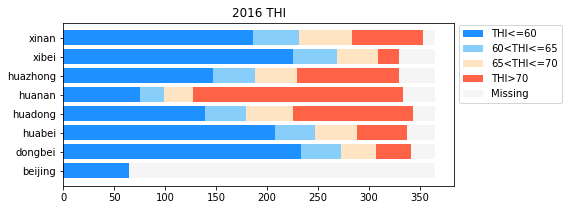

In [166]:
plt.clf()
fig, axes = plt.subplots(figsize=(7,3))
plt.barh(THIdata2016['Area'],THIdata2016['THI0'],color='dodgerblue',label='THI<=60')
plt.barh(THIdata2016['Area'],THIdata2016['THI1'],color='lightskyblue',left=THIdata2016['THI0'],label='60<THI<=65')
plt.barh(THIdata2016['Area'],THIdata2016['THI2'],color='bisque',left=np.array(THIdata2016['THI0'])+np.array(THIdata2016['THI1']),label='65<THI<=70')
plt.barh(THIdata2016['Area'],THIdata2016['THI3'],color='tomato',left=np.array(THIdata2016['THI0'])+np.array(THIdata2016['THI1'])+np.array(THIdata2016['THI2']),label='THI>70')
plt.barh(THIdata2016['Area'],THIdata2016['Missing'],color='whitesmoke',left=np.array(THIdata2016['THI0'])+np.array(THIdata2016['THI1'])+np.array(THIdata2016['THI2'])+np.array(THIdata2016['THI3']),label='Missing')
plt.legend(loc='lower left', bbox_to_anchor=(1, .48),ncol=1) 
plt.title('2016 THI')


Text(0.5,1,'2017 THI')

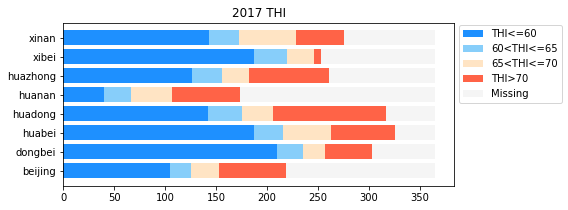

In [163]:
a=fig, axes = plt.subplots(figsize=(7,3))
a=plt.barh(THIdata2017['Area'],THIdata2017['THI0'],color='dodgerblue',label='THI<=60')
a=plt.barh(THIdata2017['Area'],THIdata2017['THI1'],color='lightskyblue',left=THIdata2017['THI0'],label='60<THI<=65')
a=plt.barh(THIdata2017['Area'],THIdata2017['THI2'],color='bisque',left=np.array(THIdata2017['THI0'])+np.array(THIdata2017['THI1']),label='65<THI<=70')
a=plt.barh(THIdata2017['Area'],THIdata2017['THI3'],color='tomato',left=np.array(THIdata2017['THI0'])+np.array(THIdata2017['THI1'])+np.array(THIdata2017['THI2']),label='THI>70')
a=plt.barh(THIdata2017['Area'],THIdata2017['Missing'],color='whitesmoke',left=np.array(THIdata2017['THI0'])+np.array(THIdata2017['THI1'])+np.array(THIdata2017['THI2'])+np.array(THIdata2017['THI3']),label='Missing')
plt.legend(loc='lower left', bbox_to_anchor=(1, .48),ncol=1) 
plt.title('2017 THI')

## 北京2017数据填充

### 寻找北京周边站点作为填充候选

In [3]:
station_l=pd.read_excel('F:\\weather\\station.xlsx',sheet_name=0,usecols=[0,1,3,4,5])

In [4]:
station_l.rename(columns={'省份':'province','区站号':'Station_Id_C','纬度':'latitude','经度':'longitude','气压传感器拔海高度（米）':'attitude'},inplace=True)

In [5]:
station_l.head()

,province,Station_Id_C,latitude,longitude,attitude
0,安徽,58015,34.27,116.20,45.4
1,安徽,58016,34.11,116.58,35.9
2,安徽,58102,33.52,115.46,39.2
3,安徽,58107,33.01,115.17,37.0
4,安徽,58108,33.14,115.20,35.0


In [6]:
station_bjh=station_l[station_l['province']=='北京']

In [7]:
station_bjh['attitude'].mean()

133.05555555555554

In [8]:
station_bjh['attitude'].std()

156.46741146217383

北京气象站平均海拔133.056米，标准差156.467米

__根据地图选定北京市（北纬39.43~41.05，东经115.41~117.50）周边经度114~119范围内 ，纬度38~42范围内，且海拔为133.056±2*156.467范围内的气象站作为填充对象__

In [9]:
station_im1=station_l[(station_l['latitude']>=38) &( station_l['latitude']<=42)]
station_im2=station_im1[(station_im1['longitude']>=114) &( station_im1['longitude']<=119)]
station_im3=station_im2[(station_im2['attitude']>=-179.88) &( station_im2['attitude']<=445.99)]

In [10]:
station_im=station_im3[station_im3['province']!='北京']

In [11]:
station_im.count()

province        81
Station_Id_C    81
latitude        81
longitude       81
attitude        81
dtype: int64

### 北京天数

In [18]:
beijing_im=beijing_f1[:]

beijing_im['Mon']=list(map(lambda s: str(s),beijing_im['Mon']))
beijing_im['Day']=list(map(lambda s: str(s),beijing_im['Day']))
beijing_im['Year']=list(map(lambda s: str(s),beijing_im['Year']))

beijing_im['Y-M-D']=beijing_im['Year']+'-'+beijing_im['Mon']+'-'+beijing_im['Day']


In [19]:
beijing2016=beijing_im[beijing_im['Year']=='2016']
beijing2017=beijing_im[beijing_im['Year']=='2017']

In [20]:
beijing2017.head()

,Year,Mon,Day,mean_THI,Area,Y-M-D
28367,2017,2,25,46.453478,beijing,2017-2-25
28391,2017,2,26,45.559923,beijing,2017-2-26
28415,2017,2,27,50.019964,beijing,2017-2-27
28439,2017,2,28,51.714369,beijing,2017-2-28
28463,2017,3,1,45.078609,beijing,2017-3-1


### 候选地区

In [21]:
station_im.head()

,province,Station_Id_C,latitude,longitude,attitude
481,河北,53596,38.51,115.08,53.4
483,河北,53680,38.18,114.23,110.1
484,河北,53682,38.38,114.41,105.3
485,河北,53688,38.25,114.33,101.8
486,河北,53689,38.01,115.04,43.5


In [22]:
path_2016='F:\\weather\\data txt\\2016txt\\'
file_2016=os.listdir('F:\\weather\\data txt\\2016txt')

In [23]:
path_2017='F:\\weather\\data txt\\2017txt\\'
file_2017=os.listdir('F:\\weather\\data txt\\2017txt')

#### 数据筛选

In [24]:
sta_im=station_im['Station_Id_C'].values.tolist()

__2016年__

In [25]:
data_m=pd.read_table(path_2016+file_2016[0],delim_whitespace=True)#多个空值作分隔符,读取第一个文件
data_m['Station_Id_C']=data_m['Station_Id_C'].apply(lambda s: s if s in sta_im else 0 )
data_im2016=data_m[data_m['Station_Id_C']>0]

i=1
while i<=len(file_2016)-1:
    data_set=pd.read_table(path_2016+file_2016[i],delim_whitespace=True)
    data_set['Station_Id_C']=data_set['Station_Id_C'].apply(lambda s: s if s in sta_im else 0 )
    data_sets=data_set[data_set['Station_Id_C']>0]
    data_im2016=pd.concat([data_im2016,data_sets])
    i+=1
else:
    print('merge complete!')

KeyboardInterrupt: 

__2017年__

In [ ]:
data_m=pd.read_table(path_2017+file_2017[0],delim_whitespace=True)#多个空值作分隔符,读取第一个文件
data_m['Station_Id_C']=data_m['Station_Id_C'].apply(lambda s: s if s in sta_im else 0 )
data_im2017=data_m[data_m['Station_Id_C']>0]

i=1
while i<=len(file_2017)-1:
    data_set=pd.read_table(path_2017+file_2017[i],delim_whitespace=True)
    data_set['Station_Id_C']=data_set['Station_Id_C'].apply(lambda s: s if s in sta_im else 0 )
    data_sets=data_set[data_set['Station_Id_C']>0]
    data_im2017=pd.concat([data_im2017,data_sets])
    i+=1
else:
    print('merge complete!')

#### 数据质控

__2016年__

__保留关键指标：相对湿度（0~100），平均、最大、最小温度（-50~+100），风速（RHU、TEM、TEM_Max、TEM_Min、WIN_D_Avg_2mi）__

In [35]:
data_imp2016=data_im2016[['Station_Id_C','Year','Mon','Day','Hour','RHU','TEM','TEM_Max','TEM_Min']]

In [36]:
data_imp2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 845834 entries, 208 to 21759
Data columns (total 9 columns):
Station_Id_C    845834 non-null object
Year            845834 non-null float64
Mon             845834 non-null float64
Day             845834 non-null float64
Hour            845834 non-null float64
RHU             845834 non-null object
TEM             845834 non-null float64
TEM_Max         845834 non-null float64
TEM_Min         845834 non-null float64
dtypes: float64(7), object(2)
memory usage: 64.5+ MB


__删除重复值：每次导出数据可能有重叠，合并“测定站-年-月-日-时间”删重__

In [37]:
data_imp2016_drop=data_imp2016.drop_duplicates(['Station_Id_C','Year','Mon','Day','Hour'],keep='first')

In [38]:
data_imp2016_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 663565 entries, 208 to 21759
Data columns (total 9 columns):
Station_Id_C    663565 non-null object
Year            663565 non-null float64
Mon             663565 non-null float64
Day             663565 non-null float64
Hour            663565 non-null float64
RHU             663565 non-null object
TEM             663565 non-null float64
TEM_Max         663565 non-null float64
TEM_Min         663565 non-null float64
dtypes: float64(7), object(2)
memory usage: 50.6+ MB


去重前845,834条数据，去重后663,565条数据。

__2017年__

__保留关键指标：相对湿度（0~100），平均、最大、最小温度（-50~+100），风速（RHU、TEM、TEM_Max、TEM_Min、WIN_D_Avg_2mi）__

In [39]:
data_imp2017=data_im2017[['Station_Id_C','Year','Mon','Day','Hour','RHU','TEM','TEM_Max','TEM_Min']]

In [40]:
data_imp2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 755102 entries, 0 to 19994
Data columns (total 9 columns):
Station_Id_C    755102 non-null object
Year            755102 non-null float64
Mon             755102 non-null float64
Day             755102 non-null float64
Hour            755102 non-null float64
RHU             755102 non-null object
TEM             755102 non-null float64
TEM_Max         755102 non-null float64
TEM_Min         755102 non-null float64
dtypes: float64(7), object(2)
memory usage: 57.6+ MB


__删除重复值：每次导出数据可能有重叠，合并“测定站-年-月-日-时间”删重__

In [41]:
data_imp2017_drop=data_imp2017.drop_duplicates(['Station_Id_C','Year','Mon','Day','Hour'],keep='first')

In [42]:
data_imp2017_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 619193 entries, 0 to 19994
Data columns (total 9 columns):
Station_Id_C    619193 non-null object
Year            619193 non-null float64
Mon             619193 non-null float64
Day             619193 non-null float64
Hour            619193 non-null float64
RHU             619193 non-null object
TEM             619193 non-null float64
TEM_Max         619193 non-null float64
TEM_Min         619193 non-null float64
dtypes: float64(7), object(2)
memory usage: 47.2+ MB


去重前755,102条数据，去重后619,193条数据。

__两年数据合并__

In [43]:
data_imputation=pd.concat([data_imp2016_drop,data_imp2017_drop])

In [44]:
data_imputation['Station_Id_C']=data_imputation['Station_Id_C'].apply(lambda s:int(s))
data_imputation.count()

Station_Id_C    1282758
Year            1282758
Mon             1282758
Day             1282758
Hour            1282758
RHU             1282758
TEM             1282758
TEM_Max         1282758
TEM_Min         1282758
dtype: int64

In [61]:
station_im['Station_Id_C'].count()

81

填充地区站点共有81个，筛选后的数据1,282,758条。

In [63]:
data_imputation.to_csv('F:\\weather\\imputation.csv',index=False,encoding='utf_8_sig',sep=',')

__核对温度是否符合：温度最大、最小、平均值之间逻辑关系：最小≤平均≤最大__

In [26]:
data_imputation=pd.read_csv('F:\\weather\\imputation.csv',sep=',')

In [27]:
data_imputation_valid=data_imputation[:]

In [28]:
data_imputation_valid['valid1']=data_imputation['TEM_Max']-data_imputation['TEM']
data_imputation_valid['valid2']=data_imputation['TEM']-data_imputation['TEM_Min']

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [29]:
data_valid=data_imputation_valid[(data_imputation_valid['valid1']>=0) | (data_imputation_valid['valid2']>=0)]

In [30]:
data_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1282758 entries, 0 to 1282757
Data columns (total 11 columns):
Station_Id_C    1282758 non-null int64
Year            1282758 non-null float64
Mon             1282758 non-null float64
Day             1282758 non-null float64
Hour            1282758 non-null float64
RHU             1282758 non-null int64
TEM             1282758 non-null float64
TEM_Max         1282758 non-null float64
TEM_Min         1282758 non-null float64
valid1          1282758 non-null float64
valid2          1282758 non-null float64
dtypes: float64(9), int64(2)
memory usage: 117.4 MB


可见所有温度数据符合逻辑。

__统计“测定站-年-月-日”，当天数据量≥16条的保留（总共24条），其余剔除__

In [31]:
data_imputationh=data_valid[:]

In [32]:
data_imputationh['Station_Id_C']=data_imputationh['Station_Id_C'].apply(lambda s : str(s))

In [33]:
data_imputationh['Year']=data_imputationh['Year'].apply(lambda s : str(s))

In [34]:
data_imputationh['Mon']=data_imputationh['Mon'].apply(lambda s : str(s))

In [35]:
data_imputationh['Day']=data_imputationh['Day'].apply(lambda s : str(s))

In [36]:
data_imputationh['SYMD']=data_imputationh['Station_Id_C']+'-'+data_imputationh['Year']+'-'+data_imputationh['Mon']+'-'+data_imputationh['Day']

In [37]:
valid=data_imputationh['SYMD'].value_counts()
valid1=valid.to_frame('SYMD_count')

In [38]:
data_imputationh1=pd.merge(data_imputationh,valid1,left_on='SYMD',right_index=True)

In [39]:
data_imputationhf=data_imputationh1[data_imputationh1['SYMD_count']>=16]

In [40]:
data_imputationhf.head()

,Station_Id_C,Year,Mon,Day,Hour,RHU,TEM,TEM_Max,TEM_Min,valid1,valid2,SYMD,SYMD_count
0,53596,2016.0,1.0,4.0,0.0,92,-4.6,-3.8,-4.6,0.8,0.0,53596-2016.0-1.0-4.0,24
1,53596,2016.0,1.0,4.0,1.0,94,-4.0,-4.0,-4.7,0.0,0.7,53596-2016.0-1.0-4.0,24
2,53596,2016.0,1.0,4.0,2.0,91,-1.1,-1.1,-4.0,0.0,2.9,53596-2016.0-1.0-4.0,24
3,53596,2016.0,1.0,4.0,3.0,52,1.2,1.2,-1.2,0.0,2.4,53596-2016.0-1.0-4.0,24
4,53596,2016.0,1.0,4.0,4.0,50,1.7,1.9,1.1,0.2,0.6,53596-2016.0-1.0-4.0,24


In [41]:
data_imputationhf['Station_Id_C'].count()

1219097

保留了足够重复数据1,219,097行

__统计“测定站-年-月”，当月数据量≥15天以上保留（总共28-31条），其余剔除__

In [227]:
# data_bjd=data_bjhf[:]

# data_bjd['SYM']=data_bjd['Station_Id_C']+'-'+data_bjd['Year']+'-'+data_bjd['Mon']

# data_bjd1=data_bjd.drop_duplicates('SYMD',keep='first')

# valid=data_bjd1['SYM'].value_counts()
# valid1=valid.to_frame('SYM_count')

# data_bjd2=pd.merge(data_bjd,valid1,left_on='SYM',right_index=True,how='left')

# data_bjdf=data_bjd2[data_bjd2['SYM_count']>=15]

# data_bjdf.info()

保留了足够重复数据154,408行。

__计算北京市温湿度指数（THI），取平均温度计算。计算公式：THI=0.81*温度+(0.99*温度-14.3)*相对湿度/100+46.3__

In [42]:
data_imputation_final=data_imputationhf[['Station_Id_C','Year','Mon','Day','Hour','RHU','TEM','TEM_Max','TEM_Min']]

In [43]:
data_imputation_final['Year']=data_imputation_final['Year'].apply(lambda s :float(s))

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [44]:
data_imputation_final['Mon']=data_imputation_final['Mon'].apply(lambda s :float(s))

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [45]:
data_imputation_final['Day']=data_imputation_final['Day'].apply(lambda s :float(s))

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [46]:
data_imputation_final['THI']=0.81*data_imputation_final['TEM']+(0.99*data_imputation_final['TEM']-14.3)*(data_imputation_final['RHU']/100)+46.3

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [47]:
data_imputation_final.head()

,Station_Id_C,Year,Mon,Day,Hour,RHU,TEM,TEM_Max,TEM_Min,THI
0,53596,2016.0,1.0,4.0,0.0,92,-4.6,-3.8,-4.6,25.22832
1,53596,2016.0,1.0,4.0,1.0,94,-4.0,-4.0,-4.7,25.89560
2,53596,2016.0,1.0,4.0,2.0,91,-1.1,-1.1,-4.0,31.40501
3,53596,2016.0,1.0,4.0,3.0,52,1.2,1.2,-1.2,40.45376
4,53596,2016.0,1.0,4.0,4.0,50,1.7,1.9,1.1,41.36850


In [48]:
data_imputation_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1219097 entries, 0 to 1282751
Data columns (total 10 columns):
Station_Id_C    1219097 non-null object
Year            1219097 non-null float64
Mon             1219097 non-null float64
Day             1219097 non-null float64
Hour            1219097 non-null float64
RHU             1219097 non-null int64
TEM             1219097 non-null float64
TEM_Max         1219097 non-null float64
TEM_Min         1219097 non-null float64
THI             1219097 non-null float64
dtypes: float64(8), int64(1), object(1)
memory usage: 102.3+ MB


In [89]:
data_imputation_final.to_csv("F:\\weather\\imputation-plot.csv",index=False,sep=',')

#### 计算天数

In [49]:
imputation=data_imputation_final[:]

print(imputation.info())
print('--'*40)

imputation['THI']=list(map(lambda s: float(s),imputation['THI']))
imputation['Mon']=list(map(lambda s: int(s),imputation['Mon']))
imputation['Day']=list(map(lambda s: int(s),imputation['Day']))
imputation['Year']=list(map(lambda s: int(s),imputation['Year']))

imputation_y=imputation[imputation['THI']<=100] #删除THI异常值

imputation_y['Mon']=list(map(lambda s: str(s),imputation_y['Mon']))
imputation_y['Day']=list(map(lambda s: str(s),imputation_y['Day']))
imputation_y['Year']=list(map(lambda s: str(s),imputation_y['Year']))

imputation_y['Y-M-D']=imputation_y['Year']+'-'+imputation_y['Mon']+'-'+imputation_y['Day']

mean_THI_db=imputation_y['THI'].groupby([imputation_y['Y-M-D']]).mean()

m_THI_db=mean_THI_db.to_frame('mean_THI')

imputation_f=pd.merge(imputation_y,m_THI_db,left_on='Y-M-D',right_index=True)

imputation_f['Mon']=list(map(lambda s: int(s),imputation_f['Mon']))
imputation_f['Day']=list(map(lambda s: int(s),imputation_f['Day']))

imputation_f1=imputation_f.drop_duplicates(['Year','Mon','Day','mean_THI'],keep='first')[['Year','Mon','Day','mean_THI']].sort_values(by=['Year','Mon','Day'])

print(imputation_f1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1219097 entries, 0 to 1282751
Data columns (total 10 columns):
Station_Id_C    1219097 non-null object
Year            1219097 non-null float64
Mon             1219097 non-null float64
Day             1219097 non-null float64
Hour            1219097 non-null float64
RHU             1219097 non-null int64
TEM             1219097 non-null float64
TEM_Max         1219097 non-null float64
TEM_Min         1219097 non-null float64
THI             1219097 non-null float64
dtypes: float64(8), int64(1), object(1)
memory usage: 102.3+ MB
None
--------------------------------------------------------------------------------


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-cop

<class 'pandas.core.frame.DataFrame'>
Int64Index: 635 entries, 1794 to 1270969
Data columns (total 4 columns):
Year        635 non-null object
Mon         635 non-null int64
Day         635 non-null int64
mean_THI    635 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 24.8+ KB
None


In [50]:
imputation_im=imputation_f1[:]

imputation_im['Mon']=list(map(lambda s: str(s),imputation_im['Mon']))
imputation_im['Day']=list(map(lambda s: str(s),imputation_im['Day']))
imputation_im['Year']=list(map(lambda s: str(s),imputation_im['Year']))

imputation_im['Y-M-D']=imputation_im['Year']+'-'+imputation_im['Mon']+'-'+imputation_im['Day']


In [51]:
imputation_im.head()

,Year,Mon,Day,mean_THI,Y-M-D
1794,2015,12,30,35.919817,2015-12-30
1818,2015,12,31,35.312431,2015-12-31
1842,2016,1,1,32.830729,2016-1-1
1866,2016,1,2,34.158305,2016-1-2
1890,2016,1,3,31.475090,2016-1-3


### 北京缺失天数填充

#### 2016年

In [52]:
bj_im2016=beijing2016['Y-M-D'].values.tolist()

In [53]:
imputation2016=imputation_im[imputation_im['Year']=='2016']
imputation2016.head()

,Year,Mon,Day,mean_THI,Y-M-D
1842,2016,1,1,32.830729,2016-1-1
1866,2016,1,2,34.158305,2016-1-2
1890,2016,1,3,31.475090,2016-1-3
0,2016,1,4,37.103256,2016-1-4
24,2016,1,5,33.997130,2016-1-5


In [54]:
imputation2016['Y-M-D']=imputation2016['Y-M-D'].apply(lambda s : s if s not in bj_im2016 else 0)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [55]:
imputation2016_im=imputation2016[imputation2016['Y-M-D']!=0]

In [56]:
imputation2016_im['Area']='beijing'

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [57]:
imputation2016_im.count()

Year        265
Mon         265
Day         265
mean_THI    265
Y-M-D       265
Area        265
dtype: int64

#### 2017年

In [58]:
bj_im2017=beijing2017['Y-M-D'].values.tolist()

imputation2017=imputation_im[imputation_im['Year']=='2017']
imputation2017.head()

imputation2017['Y-M-D']=imputation2017['Y-M-D'].apply(lambda s : s if s not in bj_im2017 else 0)

imputation2017_im=imputation2017[imputation2017['Y-M-D']!=0]

imputation2017_im['Area']='beijing'

imputation2017_im.count()

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


Year        106
Mon         106
Day         106
mean_THI    106
Y-M-D       106
Area        106
dtype: int64

__2016年可填充265天，2017年可填充106天__

#### 填充

In [59]:
beijing2016_new=pd.concat([beijing2016,imputation2016_im])[['Year','Mon','Day','mean_THI','Area']]

beijing2017_new=pd.concat([beijing2017,imputation2017_im])[['Year','Mon','Day','mean_THI','Area']]

In [60]:
beijing2017_new.count()

Year        324
Mon         324
Day         324
mean_THI    324
Area        324
dtype: int64

In [61]:
plot_area=pd.read_csv('F:\\weather\\plot_area.csv',sep=',')

In [62]:
plot_area['Year']=plot_area['Year'].apply(lambda s :str(s))

In [63]:
plot_area2017_new=plot_area[plot_area['Year']=='2017']
plot_area2016_new=plot_area[plot_area['Year']=='2016']

plot_area2017_new=pd.concat([plot_area2017_new,beijing2017_new])
plot_area2016_new=pd.concat([plot_area2016_new,beijing2016_new])

#### THI分组

In [64]:
Area=['beijing','huadong','huabei','huanan','huazhong','xinan','xibei','dongbei']

In [65]:
THI0=plot_area2016_new[plot_area2016_new['mean_THI']<=68]
THI1=plot_area2016_new[(plot_area2016_new['mean_THI']>68) & (plot_area2016_new['mean_THI']<=72)]
THI2=plot_area2016_new[(plot_area2016_new['mean_THI']>72) & (plot_area2016_new['mean_THI']<=78)]
THI3=plot_area2016_new[plot_area2016_new['mean_THI']>78]
THI_0=[]
THI_1=[]
THI_2=[]
THI_3=[]

i=0
while i < len(Area):
    THIa=THI0[THI0['Area']==Area[i]]['Area'].count()
    THIb=THI1[THI1['Area']==Area[i]]['Area'].count()
    THIc=THI2[THI2['Area']==Area[i]]['Area'].count()
    THId=THI3[THI3['Area']==Area[i]]['Area'].count()
    THI_0.append(THIa)
    THI_1.append(THIb)
    THI_2.append(THIc)
    THI_3.append(THId)
    i+=1

THIdict={'Area':Area,'THI0':THI_0,'THI1':THI_1,'THI2':THI_2,'THI3':THI_3}

THIdata2016=pd.DataFrame(data=THIdict)

THIdata2016['Year']='2016'

In [66]:
THI0=plot_area2017_new[plot_area2017_new['mean_THI']<=68]
THI1=plot_area2017_new[(plot_area2017_new['mean_THI']>68) & (plot_area2017_new['mean_THI']<=72)]
THI2=plot_area2017_new[(plot_area2017_new['mean_THI']>72) & (plot_area2017_new['mean_THI']<=78)]
THI3=plot_area2017_new[plot_area2017_new['mean_THI']>78]
THI_0=[]
THI_1=[]
THI_2=[]
THI_3=[]

i=0
while i < len(Area):
    THIa=THI0[THI0['Area']==Area[i]]['Area'].count()
    THIb=THI1[THI1['Area']==Area[i]]['Area'].count()
    THIc=THI2[THI2['Area']==Area[i]]['Area'].count()
    THId=THI3[THI3['Area']==Area[i]]['Area'].count()
    THI_0.append(THIa)
    THI_1.append(THIb)
    THI_2.append(THIc)
    THI_3.append(THId)
    i+=1

THIdict={'Area':Area,'THI0':THI_0,'THI1':THI_1,'THI2':THI_2,'THI3':THI_3}

THIdata2017=pd.DataFrame(data=THIdict)

THIdata2017['Year']='2017'

In [67]:
THIdata2016['THI0']=THIdata2016['THI0'].apply(lambda s :int(s))
THIdata2016['THI1']=THIdata2016['THI1'].apply(lambda s :int(s))
THIdata2016['THI2']=THIdata2016['THI2'].apply(lambda s :int(s))
THIdata2016['THI3']=THIdata2016['THI3'].apply(lambda s :int(s))

In [68]:
THIdata2017['THI0']=THIdata2017['THI0'].apply(lambda s :int(s))
THIdata2017['THI1']=THIdata2017['THI1'].apply(lambda s :int(s))
THIdata2017['THI2']=THIdata2017['THI2'].apply(lambda s :int(s))
THIdata2017['THI3']=THIdata2017['THI3'].apply(lambda s :int(s))

In [69]:
THIdata=pd.concat([THIdata2016,THIdata2017]).sort_values(by=['Area','Year'])

In [70]:
THIdata2016['Missing']=365-THIdata2016['THI0']-THIdata2016['THI1']-THIdata2016['THI2']-THIdata2016['THI3']

THIdata2017['Missing']=365-THIdata2017['THI0']-THIdata2017['THI1']-THIdata2017['THI2']-THIdata2017['THI3']

THIdata['Missing']=365-THIdata['THI0']-THIdata['THI1']-THIdata['THI2']-THIdata['THI3']

In [71]:
THIdata2016

,Area,THI0,THI1,THI2,THI3,Year,Missing
0,beijing,223,37,46,23,2016,36
1,huadong,207,35,50,51,2016,22
2,huabei,275,23,34,5,2016,28
3,huanan,115,25,86,107,2016,32
4,huazhong,216,29,45,39,2016,36
5,xinan,258,52,36,7,2016,12
6,xibei,291,38,0,0,2016,36
7,dongbei,293,25,22,1,2016,24


In [72]:
THIdata2017

,Area,THI0,THI1,THI2,THI3,Year,Missing
0,beijing,222,28,55,19,2017,41
1,huadong,195,22,49,51,2017,48
2,huabei,248,33,42,2,2017,40
3,huanan,95,26,43,9,2017,192
4,huazhong,174,26,44,17,2017,104
5,xinan,201,51,22,1,2017,90
6,xibei,233,19,1,0,2017,112
7,dongbei,248,27,28,0,2017,62


#### 作图

In [80]:
area_en=['Beijing','Dongbei','Huabei','Huadong','Huanan','Huazhong','Xibei','Xinan']
area_ch=['北京','东北','华北','华东','华南','华中','西北','西南']

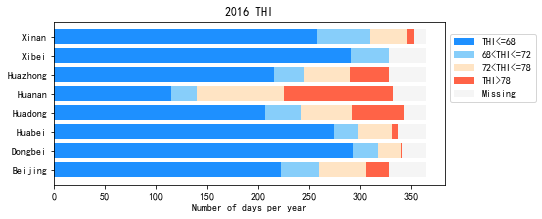

In [96]:
plt.clf()
fig, axes = plt.subplots(figsize=(7,3))
plt.barh(THIdata2016['Area'],THIdata2016['THI0'],color='dodgerblue',label='THI<=68')
plt.barh(THIdata2016['Area'],THIdata2016['THI1'],color='lightskyblue',left=THIdata2016['THI0'],label='68<THI<=72')
plt.barh(THIdata2016['Area'],THIdata2016['THI2'],color='bisque',left=np.array(THIdata2016['THI0'])+np.array(THIdata2016['THI1']),label='72<THI<=78')
plt.barh(THIdata2016['Area'],THIdata2016['THI3'],color='tomato',left=np.array(THIdata2016['THI0'])+np.array(THIdata2016['THI1'])+np.array(THIdata2016['THI2']),label='THI>78')
plt.barh(THIdata2016['Area'],THIdata2016['Missing'],color='whitesmoke',left=np.array(THIdata2016['THI0'])+np.array(THIdata2016['THI1'])+np.array(THIdata2016['THI2'])+np.array(THIdata2016['THI3']),label='Missing')
plt.legend(loc='lower left', bbox_to_anchor=(1, .48),ncol=1) 
plt.title('2016 THI')
plt.yticks(np.arange(len(area_en)),area_en)
plt.xlabel('Number of days per year')
plt.savefig("F:\\weather\\2016THI_en.png",bbox_inches='tight',dpi=600)

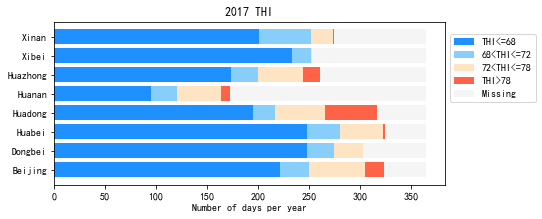

In [97]:
a=fig, axes = plt.subplots(figsize=(7,3))
a=plt.barh(THIdata2017['Area'],THIdata2017['THI0'],color='dodgerblue',label='THI<=68')
a=plt.barh(THIdata2017['Area'],THIdata2017['THI1'],color='lightskyblue',left=THIdata2017['THI0'],label='68<THI<=72')
a=plt.barh(THIdata2017['Area'],THIdata2017['THI2'],color='bisque',left=np.array(THIdata2017['THI0'])+np.array(THIdata2017['THI1']),label='72<THI<=78')
a=plt.barh(THIdata2017['Area'],THIdata2017['THI3'],color='tomato',left=np.array(THIdata2017['THI0'])+np.array(THIdata2017['THI1'])+np.array(THIdata2017['THI2']),label='THI>78')
a=plt.barh(THIdata2017['Area'],THIdata2017['Missing'],color='whitesmoke',left=np.array(THIdata2017['THI0'])+np.array(THIdata2017['THI1'])+np.array(THIdata2017['THI2'])+np.array(THIdata2017['THI3']),label='Missing')
plt.legend(loc='lower left', bbox_to_anchor=(1, .48),ncol=1) 
plt.title('2017 THI')
plt.yticks(np.arange(len(area_en)),area_en)
plt.xlabel('Number of days per year')
plt.savefig("F:\\weather\\2017THI_en.png",bbox_inches='tight',dpi=600)

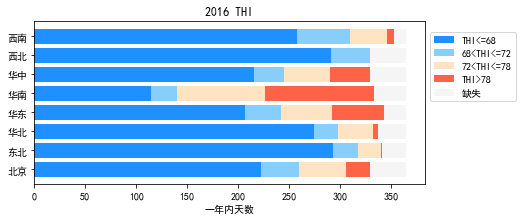

In [98]:
plt.clf()
fig, axes = plt.subplots(figsize=(7,3))
plt.barh(THIdata2016['Area'],THIdata2016['THI0'],color='dodgerblue',label='THI<=68')
plt.barh(THIdata2016['Area'],THIdata2016['THI1'],color='lightskyblue',left=THIdata2016['THI0'],label='68<THI<=72')
plt.barh(THIdata2016['Area'],THIdata2016['THI2'],color='bisque',left=np.array(THIdata2016['THI0'])+np.array(THIdata2016['THI1']),label='72<THI<=78')
plt.barh(THIdata2016['Area'],THIdata2016['THI3'],color='tomato',left=np.array(THIdata2016['THI0'])+np.array(THIdata2016['THI1'])+np.array(THIdata2016['THI2']),label='THI>78')
plt.barh(THIdata2016['Area'],THIdata2016['Missing'],color='whitesmoke',left=np.array(THIdata2016['THI0'])+np.array(THIdata2016['THI1'])+np.array(THIdata2016['THI2'])+np.array(THIdata2016['THI3']),label='缺失')
plt.legend(loc='lower left', bbox_to_anchor=(1, .48),ncol=1) 
plt.title('2016 THI')
plt.yticks(np.arange(len(area_ch)),area_ch)
plt.xlabel('一年内天数')
plt.savefig("F:\\weather\\2016THI_ch.png",bbox_inches='tight',dpi=600)

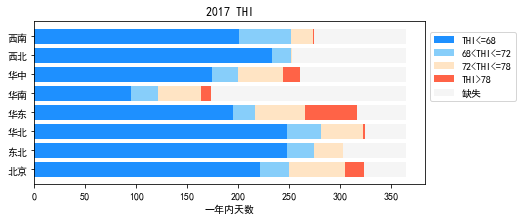

In [99]:
a=fig, axes = plt.subplots(figsize=(7,3))
a=plt.barh(THIdata2017['Area'],THIdata2017['THI0'],color='dodgerblue',label='THI<=68')
a=plt.barh(THIdata2017['Area'],THIdata2017['THI1'],color='lightskyblue',left=THIdata2017['THI0'],label='68<THI<=72')
a=plt.barh(THIdata2017['Area'],THIdata2017['THI2'],color='bisque',left=np.array(THIdata2017['THI0'])+np.array(THIdata2017['THI1']),label='72<THI<=78')
a=plt.barh(THIdata2017['Area'],THIdata2017['THI3'],color='tomato',left=np.array(THIdata2017['THI0'])+np.array(THIdata2017['THI1'])+np.array(THIdata2017['THI2']),label='THI>78')
a=plt.barh(THIdata2017['Area'],THIdata2017['Missing'],color='whitesmoke',left=np.array(THIdata2017['THI0'])+np.array(THIdata2017['THI1'])+np.array(THIdata2017['THI2'])+np.array(THIdata2017['THI3']),label='缺失')
plt.legend(loc='lower left', bbox_to_anchor=(1, .48),ncol=1) 
plt.title('2017 THI')
plt.yticks(np.arange(len(area_ch)),area_ch)
plt.xlabel('一年内天数')
plt.savefig("F:\\weather\\2017THI_ch.png",bbox_inches='tight',dpi=600)